In [ ]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Importação de pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from datetime import datetime

In [158]:
# Lê o arquivo
df_passagens = pd.read_csv("../2023_Passagem.csv", encoding='latin1', on_bad_lines = 'warn', sep=';')

Skipping line 24995: expected 19 fields, saw 35

Skipping line 49995: expected 19 fields, saw 25

Skipping line 74978: expected 19 fields, saw 27



In [159]:
df_passagens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329657 entries, 0 to 329656
Data columns (total 19 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   Identificador do processo de viagem  329657 non-null  int64 
 1   Número da Proposta (PCDP)            329657 non-null  object
 2   Meio de transporte                   329657 non-null  object
 3   País - Origem ida                    329657 non-null  object
 4   UF - Origem ida                      319256 non-null  object
 5   Cidade - Origem ida                  329657 non-null  object
 6   País - Destino ida                   329657 non-null  object
 7   UF - Destino ida                     316569 non-null  object
 8   Cidade - Destino ida                 329657 non-null  object
 9   País - Origem volta                  329655 non-null  object
 10  UF - Origem volta                    325989 non-null  object
 11  Cidade - Origem volta     

In [164]:
df_passagens.head(10)

,Identificador do processo de viagem,Número da Proposta (PCDP),Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Data da emissão/compra,Hora da emissão/compra
0,18288418,000007/23-1C,Aéreo,Brasil,Distrito Federal,Brasília,Estados Unidos da América,None,Nova York,Estados Unidos da América,None,Nova York,Brasil,Distrito Federal,Brasília,"7434,13","0,00",04/11/2022,11:04
1,18302983,000001/23,Aéreo,Brasil,São Paulo,São Paulo,Suécia,None,Gotemburgo,Suécia,None,Gotemburgo,Brasil,São Paulo,São Paulo,"9903,32","4999,78",15/09/2022,13:39
2,18306758,000002/23,Aéreo,Brasil,São Paulo,São Paulo,Suécia,None,Gotemburgo,Suécia,None,Gotemburgo,Brasil,São Paulo,São Paulo,"9903,32","4999,78",15/09/2022,13:42
3,18306785,000004/23,Aéreo,Brasil,São Paulo,São Paulo,Suécia,None,Gotemburgo,Suécia,None,Gotemburgo,Brasil,São Paulo,São Paulo,"9903,32","4999,78",15/09/2022,13:51
4,18306786,000003/23,Aéreo,Brasil,São Paulo,São Paulo,Suécia,None,Gotemburgo,Suécia,None,Gotemburgo,Brasil,São Paulo,São Paulo,"9903,32","4999,78",15/09/2022,13:48
5,18320442,000002/23,Aéreo,Brasil,Rio de Janeiro,Rio de Janeiro,Brasil,Rio Grande do Norte,Natal,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,"1518,18","0,00",06/12/2022,16:35
6,18320483,000003/23,Aéreo,Brasil,Rio de Janeiro,Rio de Janeiro,Brasil,Rio Grande do Norte,Natal,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,"1369,29","0,00",06/12/2022,16:31
7,18320580,000004/23,Aéreo,Brasil,Rio de Janeiro,Rio de Janeiro,Brasil,Rio Grande do Norte,Natal,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,"1369,29","0,00",06/12/2022,16:33
8,18345549,000001/23,Aéreo,Portugal,None,Lisboa,Brasil,Tocantins,Palmas,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,"4336,39","0,00",23/11/2022,15:41
9,18345549,000001/23,Aéreo,Brasil,Tocantins,Palmas,Portugal,None,Lisboa,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,"4336,39","0,00",23/11/2022,15:41


In [162]:
"""
Tratamento em todas as colunas para colocar o valor None quando o valor for 'Não informado' ou NaN
"""
for c in df_passagens.columns:
    df_passagens[c] = df_passagens[c].apply(lambda x: x if x != 'Sem Informação' and pd.notnull(x) else None)

In [ ]:
"""
A conversão pode ser feita utilizando o método apply da série que deseja converter.
"""
def converter_numero(valor):
    try:
        return float(valor.replace('.', '').replace(',', '.'))
    except:
        return np.nan

In [165]:
df_passagens_1 = df_passagens.copy()
df_passagens_1['Valor da passagem'] = \
    df_passagens_1['Valor da passagem'].apply(converter_numero)
df_passagens_1['Taxa de serviço'] =  \
    df_passagens_1['Taxa de serviço'].apply(converter_numero)

In [166]:
df_passagens_1[['Valor da passagem', 'Taxa de serviço']].head()
df_passagens_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329657 entries, 0 to 329656
Data columns (total 19 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Identificador do processo de viagem  329657 non-null  int64  
 1   Número da Proposta (PCDP)            329657 non-null  object 
 2   Meio de transporte                   329657 non-null  object 
 3   País - Origem ida                    329657 non-null  object 
 4   UF - Origem ida                      319256 non-null  object 
 5   Cidade - Origem ida                  329657 non-null  object 
 6   País - Destino ida                   329657 non-null  object 
 7   UF - Destino ida                     316569 non-null  object 
 8   Cidade - Destino ida                 329657 non-null  object 
 9   País - Origem volta                  329655 non-null  object 
 10  UF - Origem volta                    325989 non-null  object 
 11  Cidade - Orig

In [173]:
"""
Padronização das strings é interessante para que a ausência
ou a presença de acentos não interfira em agrupamentos.
"""

from texto import TratamentoTexto
def tratar_texto(valor):
    v = valor

    # somente realiza o tratamento se o texto não for nulo
    if v:
        # remove acentuação
        v = TratamentoTexto.remover_acentuacao(v)
        # converte para letras maiúsculas
        v = v.upper()

    return v

In [174]:
colunas = ['Meio de transporte',
       'País - Origem ida', 'UF - Origem ida', 'Cidade - Origem ida',
       'País - Destino ida', 'UF - Destino ida', 'Cidade - Destino ida',
       'País - Origem volta', 'UF - Origem volta', 'Cidade - Origem volta',
       'Pais - Destino volta', 'UF - Destino volta', 'Cidade - Destino volta']

# padronize as colunas da lista acima no dataframe df_passagens_1
for c in colunas:
    df_passagens_1[c] = df_passagens_1[c].apply(tratar_texto)

In [183]:
df_passagens_1.head()

,Identificador do processo de viagem,Número da Proposta (PCDP),Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Data da emissão/compra,Hora da emissão/compra
0,18288418,000007/23-1C,AEREO,BRASIL,DISTRITO FEDERAL,BRASILIA,ESTADOS UNIDOS DA AMERICA,None,NOVA YORK,ESTADOS UNIDOS DA AMERICA,None,NOVA YORK,BRASIL,DISTRITO FEDERAL,BRASILIA,7434.13,0.00,04/11/2022,11:04
1,18302983,000001/23,AEREO,BRASIL,SAO PAULO,SAO PAULO,SUECIA,None,GOTEMBURGO,SUECIA,None,GOTEMBURGO,BRASIL,SAO PAULO,SAO PAULO,9903.32,4999.78,15/09/2022,13:39
2,18306758,000002/23,AEREO,BRASIL,SAO PAULO,SAO PAULO,SUECIA,None,GOTEMBURGO,SUECIA,None,GOTEMBURGO,BRASIL,SAO PAULO,SAO PAULO,9903.32,4999.78,15/09/2022,13:42
3,18306785,000004/23,AEREO,BRASIL,SAO PAULO,SAO PAULO,SUECIA,None,GOTEMBURGO,SUECIA,None,GOTEMBURGO,BRASIL,SAO PAULO,SAO PAULO,9903.32,4999.78,15/09/2022,13:51
4,18306786,000003/23,AEREO,BRASIL,SAO PAULO,SAO PAULO,SUECIA,None,GOTEMBURGO,SUECIA,None,GOTEMBURGO,BRASIL,SAO PAULO,SAO PAULO,9903.32,4999.78,15/09/2022,13:48


In [176]:
colunas_gb = ['País - Origem ida', 'UF - Origem ida', 'Cidade - Origem ida',
       'País - Destino ida', 'UF - Destino ida', 'Cidade - Destino ida']

colunas_selecao = ['País - Origem ida', 'UF - Origem ida',
                   'Cidade - Origem ida',
       'País - Destino ida', 'UF - Destino ida',
                   'Cidade - Destino ida', 'Valor da passagem']

df_passagens_1[colunas_selecao]\
    .groupby(colunas_gb, as_index=False)\
    .agg(['count', 'mean', 'median'])\
    .sort_values(('Valor da passagem', 'count'), ascending=False)\
    .head(10)

Valor da passagem  \
                                                                                                                              count   
País - Origem ida UF - Origem ida   Cidade - Origem ida País - Destino ida UF - Destino ida  Cidade - Destino ida                     
BRASIL            RIO DE JANEIRO    RIO DE JANEIRO      BRASIL             DISTRITO FEDERAL  BRASILIA                         15864   
                  DISTRITO FEDERAL  BRASILIA            BRASIL             RIO DE JANEIRO    RIO DE JANEIRO                   14848   
                  SAO PAULO         SAO PAULO           BRASIL             DISTRITO FEDERAL  BRASILIA                         12044   
                  DISTRITO FEDERAL  BRASILIA            BRASIL             SAO PAULO         SAO PAULO                        11902   
                  RIO GRANDE DO SUL PORTO ALEGRE        BRASIL             DISTRITO FEDERAL  BRASILIA                          4251   
                  DISTRITO FEDERAL  BRASILIA            BRASIL             RIO GRANDE DO SUL PORTO ALEGRE                      4192   
                  PERNAMBUCO        RECIFE              BRASIL             DISTRITO FEDERAL  BRASILIA                          3746   
                  DISTRITO FEDERAL  BRASILIA            BRASIL             PERNAMBUCO        RECIFE                            3565   
                  MINAS GERAIS      BELO HORIZONTE      BRASIL             DISTRITO FEDERAL  BRASILIA                          3527   
                  DISTRITO FEDERAL  BRASILIA            BRASIL             BAHIA             SALVADOR                          3443   

                                                                                                                                \
                                                                                                                          mean   
País - Origem ida UF - Origem ida   Cidade - Origem ida País - Destino ida UF - Destino ida  Cidade - Destino ida                
BRASIL            RIO DE JANEIRO    RIO DE JANEIRO      BRASIL             DISTRITO FEDERAL  BRASILIA              1487.163130   
                  DISTRITO FEDERAL  BRASILIA            BRASIL             RIO DE JANEIRO    RIO DE JANEIRO        1419.600913   
                  SAO PAULO         SAO PAULO           BRASIL             DISTRITO FEDERAL  BRASILIA              1459.776802   
                  DISTRITO FEDERAL  BRASILIA            BRASIL             SAO PAULO         SAO PAULO             1450.879762   
                  RIO GRANDE DO SUL PORTO ALEGRE        BRASIL             DISTRITO FEDERAL  BRASILIA              1641.710012   
                  DISTRITO FEDERAL  BRASILIA            BRASIL             RIO GRANDE DO SUL PORTO ALEGRE          1536.242872   
                  PERNAMBUCO        RECIFE              BRASIL             DISTRITO FEDERAL  BRASILIA              1555.386829   
                  DISTRITO FEDERAL  BRASILIA            BRASIL             PERNAMBUCO        RECIFE                1385.100485   
                  MINAS GERAIS      BELO HORIZONTE      BRASIL             DISTRITO FEDERAL  BRASILIA              1767.062478   
                  DISTRITO FEDERAL  BRASILIA            BRASIL             BAHIA             SALVADOR              1129.629407   

                                                                                                                             
                                                                                                                     median  
País - Origem ida UF - Origem ida   Cidade - Origem ida País - Destino ida UF - Destino ida  Cidade - Destino ida            
BRASIL            RIO DE JANEIRO    RIO DE JANEIRO      BRASIL             DISTRITO FEDERAL  BRASILIA              1303.190  
                  DISTRITO FEDERAL  BRASILIA            BRASIL             RIO DE JANEIRO    RIO DE JANEIRO        1247.295  
                  SAO PAULO         S

In [177]:
df_passagens_1['Identificador do processo de viagem']\
    .value_counts()\
    .value_counts()

2     100796
1      35411
4      17284
3       4240
6        845
8        421
5        257
10        62
7         17
12        15
9          5
14         4
11         2
18         1
15         1
Name: Identificador do processo de viagem, dtype: int64

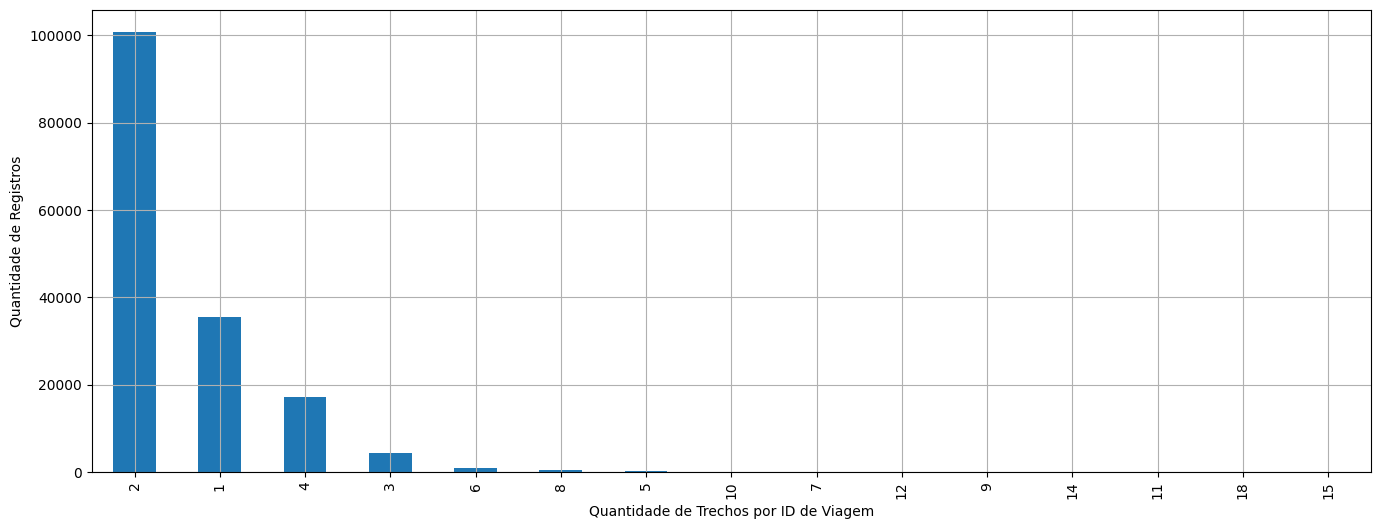

In [178]:
plt.rcParams['figure.figsize'] = (16.5,6)
df_passagens_1['Identificador do processo de viagem']\
    .value_counts()\
    .value_counts().plot.bar()
plt.xlabel('Quantidade de Trechos por ID de Viagem')
plt.ylabel('Quantidade de Registros')
#plt.yscale('log')
plt.grid(True)
plt.show()

In [196]:
grouped = df_passagens_1.groupby('Identificador do processo de viagem').size().to_frame()

In [218]:
grouped[grouped[0].sort_values(ascending=True) ==5]

,0
Identificador do processo de viagem,
18536121,5
18571876,5
18612348,5
18616994,5
18617422,5
...,...
19412316,5
19447072,5
2023000289,5


In [217]:
'''
Exemplo de uma viagem com 2 trechos
'''
df_passagens_1[ df_passagens_1['Identificador do processo de viagem'] == 18352553]

,Identificador do processo de viagem,Número da Proposta (PCDP),Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Data da emissão/compra,Hora da emissão/compra
10,18352553,000005/23-1C,AEREO,ESTADOS UNIDOS DA AMERICA,None,NOVA YORK,BRASIL,DISTRITO FEDERAL,BRASILIA,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,6506.9,0.0,21/09/2022,15:22
11,18352553,000005/23-1C,AEREO,BRASIL,DISTRITO FEDERAL,BRASILIA,ESTADOS UNIDOS DA AMERICA,None,NOVA YORK,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,6531.6,0.0,21/09/2022,15:22


In [219]:
'''
Exemplo de uma viagem com 5 trechos
'''
df_passagens_1[ df_passagens_1['Identificador do processo de viagem'] == 18536121]

,Identificador do processo de viagem,Número da Proposta (PCDP),Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Data da emissão/compra,Hora da emissão/compra
787,18536121,000085/23-3C,AEREO,REINO UNIDO,None,LONDRES,BRASIL,DISTRITO FEDERAL,BRASILIA,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,4628.24,0.0,16/11/2022,22:12
788,18536121,000085/23-3C,AEREO,BRASIL,DISTRITO FEDERAL,BRASILIA,REINO UNIDO,None,LONDRES,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,3255.42,0.0,16/11/2022,22:12
789,18536121,000085/23-3C,AEREO,REINO UNIDO,None,LONDRES,BRASIL,DISTRITO FEDERAL,BRASILIA,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,19520.02,0.0,24/01/2023,11:58
790,18536121,000085/23-3C,AEREO,REINO UNIDO,None,LONDRES,ITALIA,None,PISA,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,3244.60,0.0,22/12/2022,15:25
791,18536121,000085/23-3C,AEREO,ITALIA,None,ROMA,BRASIL,DISTRITO FEDERAL,BRASILIA,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,8910.20,0.0,22/12/2022,15:25


In [220]:
"""
Vamos criar uma coluna que identifica se o trecho faz parte de uma viagem internacional ou não
"""

# vamos marcar trechos que são de origem ou destino internacional
df_passagens_1['Trecho Internacional'] = \
    (df_passagens_1['País - Origem ida'] != 'BRASIL') | (df_passagens_1['País - Destino ida'] != 'BRASIL') \
    | ( df_passagens_1['País - Origem volta'].notnull() & ((df_passagens_1['País - Origem volta'] != 'BRASIL') | (df_passagens_1['Pais - Destino volta'] != 'BRASIL'))) \

df_passagens_1[df_passagens_1['Trecho Internacional']].head()

,Identificador do processo de viagem,Número da Proposta (PCDP),Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Data da emissão/compra,Hora da emissão/compra,Trecho Internacional
0,18288418,000007/23-1C,AEREO,BRASIL,DISTRITO FEDERAL,BRASILIA,ESTADOS UNIDOS DA AMERICA,None,NOVA YORK,ESTADOS UNIDOS DA AMERICA,None,NOVA YORK,BRASIL,DISTRITO FEDERAL,BRASILIA,7434.13,0.00,04/11/2022,11:04,True
1,18302983,000001/23,AEREO,BRASIL,SAO PAULO,SAO PAULO,SUECIA,None,GOTEMBURGO,SUECIA,None,GOTEMBURGO,BRASIL,SAO PAULO,SAO PAULO,9903.32,4999.78,15/09/2022,13:39,True
2,18306758,000002/23,AEREO,BRASIL,SAO PAULO,SAO PAULO,SUECIA,None,GOTEMBURGO,SUECIA,None,GOTEMBURGO,BRASIL,SAO PAULO,SAO PAULO,9903.32,4999.78,15/09/2022,13:42,True
3,18306785,000004/23,AEREO,BRASIL,SAO PAULO,SAO PAULO,SUECIA,None,GOTEMBURGO,SUECIA,None,GOTEMBURGO,BRASIL,SAO PAULO,SAO PAULO,9903.32,4999.78,15/09/2022,13:51,True
4,18306786,000003/23,AEREO,BRASIL,SAO PAULO,SAO PAULO,SUECIA,None,GOTEMBURGO,SUECIA,None,GOTEMBURGO,BRASIL,SAO PAULO,SAO PAULO,9903.32,4999.78,15/09/2022,13:48,True


In [221]:
# quais viagens possuem ao menos um trecho internacional
df_viagens_internacionais = \
    df_passagens_1[['Identificador do processo de viagem','Trecho Internacional']]\
    .groupby('Identificador do processo de viagem', as_index=False)\
    .max()

df_viagens_internacionais.head()

,Identificador do processo de viagem,Trecho Internacional
0,18288418,True
1,18302983,True
2,18306758,True
3,18306785,True
4,18306786,True


In [222]:
# quais processos de viagem possuem trechos internacionais
df_viagens_internacionais = df_viagens_internacionais.rename(columns={'Trecho Internacional': 'Viagem Internacional'})
df_viagens_internacionais.head()

,Identificador do processo de viagem,Viagem Internacional
0,18288418,True
1,18302983,True
2,18306758,True
3,18306785,True
4,18306786,True


In [223]:
df_passagens_2 = pd.merge(
        df_passagens_1, df_viagens_internacionais, how='left',
                          left_on='Identificador do processo de viagem', right_on='Identificador do processo de viagem')
df_passagens_2.head()

,Identificador do processo de viagem,Número da Proposta (PCDP),Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,...,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Data da emissão/compra,Hora da emissão/compra,Trecho Internacional,Viagem Internacional
0,18288418,000007/23-1C,AEREO,BRASIL,DISTRITO FEDERAL,BRASILIA,ESTADOS UNIDOS DA AMERICA,None,NOVA YORK,ESTADOS UNIDOS DA AMERICA,...,NOVA YORK,BRASIL,DISTRITO FEDERAL,BRASILIA,7434.13,0.00,04/11/2022,11:04,True,True
1,18302983,000001/23,AEREO,BRASIL,SAO PAULO,SAO PAULO,SUECIA,None,GOTEMBURGO,SUECIA,...,GOTEMBURGO,BRASIL,SAO PAULO,SAO PAULO,9903.32,4999.78,15/09/2022,13:39,True,True
2,18306758,000002/23,AEREO,BRASIL,SAO PAULO,SAO PAULO,SUECIA,None,GOTEMBURGO,SUECIA,...,GOTEMBURGO,BRASIL,SAO PAULO,SAO PAULO,9903.32,4999.78,15/09/2022,13:42,True,True
3,18306785,000004/23,AEREO,BRASIL,SAO PAULO,SAO PAULO,SUECIA,None,GOTEMBURGO,SUECIA,...,GOTEMBURGO,BRASIL,SAO PAULO,SAO PAULO,9903.32,4999.78,15/09/2022,13:51,True,True
4,18306786,000003/23,AEREO,BRASIL,SAO PAULO,SAO PAULO,SUECIA,None,GOTEMBURGO,SUECIA,...,GOTEMBURGO,BRASIL,SAO PAULO,SAO PAULO,9903.32,4999.78,15/09/2022,13:48,True,True


In [235]:
df_passagens_2[(df_passagens_2['Trecho Internacional'] == False) & (df_passagens_2['Viagem Internacional'] == True)]

,Identificador do processo de viagem,Número da Proposta (PCDP),Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,...,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Data da emissão/compra,Hora da emissão/compra,Trecho Internacional,Viagem Internacional
24,18398807,000001/23-1C,AEREO,BRASIL,AMAZONAS,MANAUS,BRASIL,AMAZONAS,PARINTINS,BRASIL,...,PARINTINS,BRASIL,AMAZONAS,MANAUS,690.43,0.0,07/10/2022,17:20,False,True
26,18398856,000002/23-1C,AEREO,BRASIL,AMAZONAS,MANAUS,BRASIL,AMAZONAS,PARINTINS,BRASIL,...,PARINTINS,BRASIL,AMAZONAS,MANAUS,1275.93,0.0,07/10/2022,17:18,False,True
1901,18604765,000006/23-1C,AEREO,BRASIL,SERGIPE,ARACAJU,BRASIL,AMAPA,MACAPA,BRASIL,...,MACAPA,BRASIL,SERGIPE,ARACAJU,2445.64,0.0,22/12/2022,15:37,False,True
3132,18623687,000129/23-2C,AEREO,BRASIL,MINAS GERAIS,BELO HORIZONTE,BRASIL,SAO PAULO,SAO PAULO,BRASIL,...,SAO PAULO,BRASIL,MINAS GERAIS,BELO HORIZONTE,1059.96,0.0,22/12/2022,18:32,False,True
5161,18632947,000012/23-1C,AEREO,BRASIL,SAO PAULO,SAO PAULO,BRASIL,DISTRITO FEDERAL,BRASILIA,BRASIL,...,BRASILIA,BRASIL,SAO PAULO,SAO PAULO,4626.10,0.0,18/01/2023,12:12,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324495,19430498,002801/23-1C,AEREO,BRASIL,DISTRITO FEDERAL,BRASILIA,BRASIL,AMAPA,MACAPA,BRASIL,...,MACAPA,BRASIL,DISTRITO FEDERAL,BRASILIA,5570.63,0.0,30/10/2023,16:18,False,True
324711,19433284,004535/23,AEREO,BRASIL,DISTRITO FEDERAL,BRASILIA,BRASIL,TOCANTINS,PALMAS,BRASIL,...,PALMAS,BRASIL,DISTRITO FEDERAL,BRASILIA,5469.54,0.0,23/10/2023,15:59,False,True
324715,19433308,003960/23-1C,AEREO,BRASIL,DISTRITO FEDERAL,BRASILIA,BRASIL,PERNAMBUCO,RECIFE,BRASIL,...,RECIFE,BRASIL,DISTRITO FEDERAL,BRASILIA,5396.05,0.0,23/10/2023,20:30,False,True
326147,19450343,056985/23-1C,AEREO,BRASIL,SAO PAULO,GUARULHOS,BRASIL,DISTRITO FEDERAL,BRASILIA,BRASIL,...,BRASILIA,BRASIL,SAO PAULO,GUARULHOS,2715.95,0.0,27/10/2023,11:33,False,True


In [238]:
df_passagens_2[df_passagens_2['Identificador do processo de viagem'] == 19430498]

,Identificador do processo de viagem,Número da Proposta (PCDP),Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,...,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Data da emissão/compra,Hora da emissão/compra,Trecho Internacional,Viagem Internacional
324494,19430498,002801/23-1C,AEREO,BRASIL,AMAPA,MACAPA,BRASIL,DISTRITO FEDERAL,BRASILIA,SEM INFORMACAO,...,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,2217.12,0.0,06/11/2023,15:21,True,True
324495,19430498,002801/23-1C,AEREO,BRASIL,DISTRITO FEDERAL,BRASILIA,BRASIL,AMAPA,MACAPA,BRASIL,...,MACAPA,BRASIL,DISTRITO FEDERAL,BRASILIA,5570.63,0.0,30/10/2023,16:18,False,True
324496,19430498,002801/23-1C,AEREO,BRASIL,DISTRITO FEDERAL,BRASILIA,BRASIL,AMAPA,MACAPA,SEM INFORMACAO,...,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,3019.41,0.0,06/11/2023,15:21,True,True


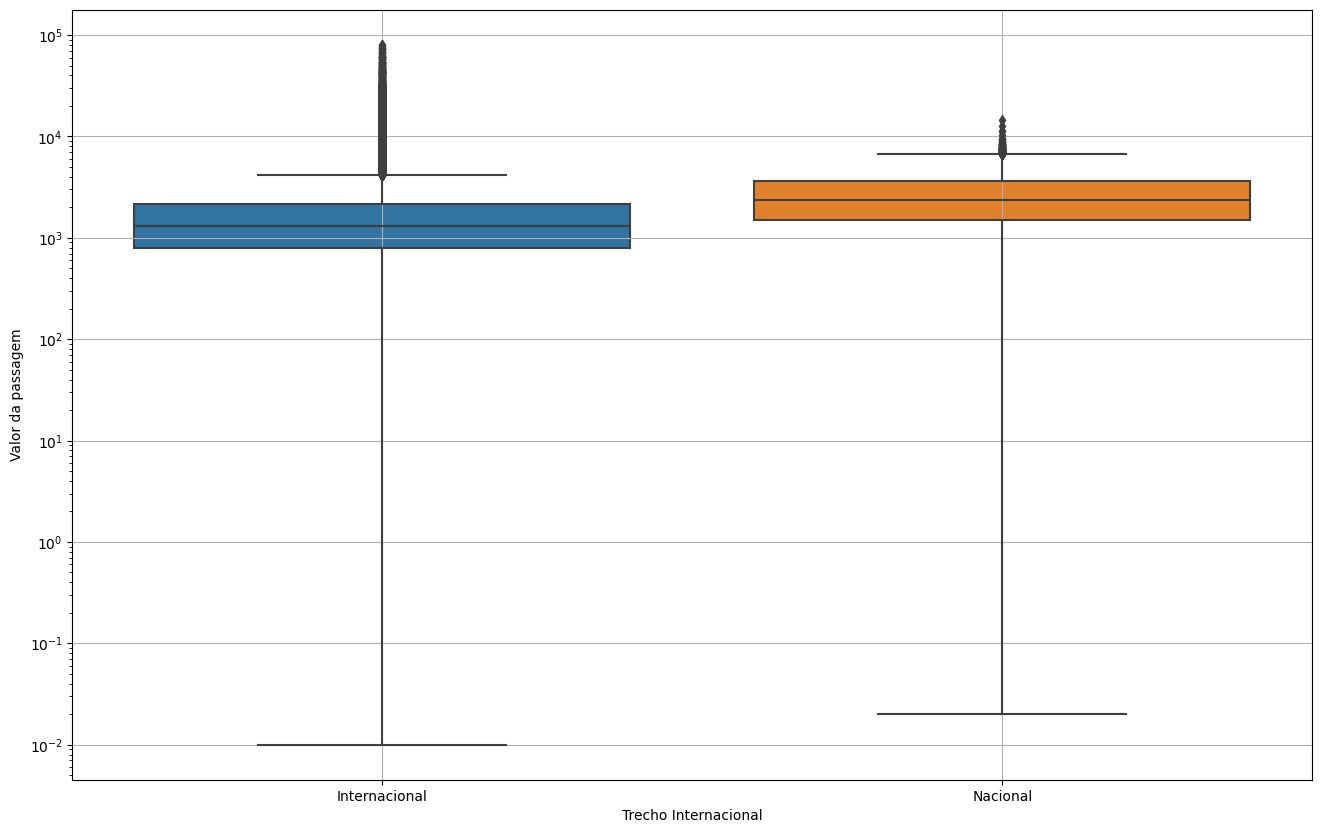

In [243]:
df_passagens_g = df_passagens_2[df_passagens_2['Valor da passagem'] > 0.001]
plt.rcParams['figure.figsize'] = 16,10
ax = sns.boxplot(y=df_passagens_g['Valor da passagem'], x=df_passagens_g['Trecho Internacional'].apply(lambda x: 'Internacional' if x else 'Nacional'))
ax.set_yscale('log')
plt.grid(True)
plt.show()

In [ ]:
# Lê o arquivo
dataset_pagamento = pd.read_csv("../2023_Pagamento.csv", encoding='latin1', on_bad_lines = 'warn', sep=';')

In [ ]:
# Mostra as dimensões do dataset
dataset_pagamento.shape

In [ ]:
dataset_pagamento.head(10)

In [ ]:
dataset_pagamento.tail(10)

In [ ]:
# Mostra as informações do dataset
dataset_pagamento.info()

In [ ]:
dataset_pagamento['Identificador do processo de viagem'] = dataset_pagamento['Identificador do processo de viagem'].astype(str)

In [ ]:
def converter_numero(valor):
    try:
        return float(valor.replace('.', '').replace(',', '.'))
    except:
        return np.nan

In [ ]:
dataset_pagamento['Valor'] = dataset_pagamento['Valor'].apply(converter_numero)

In [ ]:
dataset_pagamento.info()

In [ ]:
# Mostra as dimensões do dataset
dataset_passagem.shape

In [ ]:
dataset_passagem.head(10)

In [ ]:
dataset_passagem[ dataset_passagem['Identificador do processo de viagem'] == 18345549 ]

In [ ]:
dataset_trecho[ dataset_trecho['Identificador do processo de viagem '] == 18345549 ]

In [ ]:
dataset_trecho.columns

In [ ]:
dataset_passagem.tail(10)

In [ ]:
# Mostra as informações do dataset
dataset_passagem.info()

In [ ]:
dataset_passagem['Identificador do processo de viagem'] = dataset_passagem['Identificador do processo de viagem'].astype(str)

In [ ]:
dataset_passagem['Valor da passagem'] = dataset_passagem['Valor da passagem'].apply(converter_numero)

In [ ]:
def converter_data(dt):
    try:
        return datetime.strptime(dt, '%d/%m/%Y').date()
    except:
        return np.nan

In [ ]:
dataset_passagem['Data da emissão/compra'] = dataset_passagem['Data da emissão/compra'].apply(converter_data)

In [ ]:
dataset_passagem.info()

In [ ]:
dataset_trecho = pd.read_csv("../2023_Trecho.csv", encoding='latin1', on_bad_lines = 'warn', sep=';')

In [ ]:
# Mostra as dimensões do dataset
dataset_trecho.shape

In [ ]:
dataset_trecho.head(10)

In [ ]:
dataset_trecho.tail(10)

In [ ]:
# Mostra as informações do dataset
dataset_trecho.info()

In [ ]:
dataset_trecho['Identificador do processo de viagem '] = dataset_trecho['Identificador do processo de viagem '].astype(str)

In [ ]:
dataset_trecho.info()

In [ ]:
dataset_trecho.head()

In [ ]:
dataset_viagem = pd.read_csv("../2023_Viagem.csv", encoding='latin1', on_bad_lines = 'warn', sep=';')

In [ ]:
# Mostra as dimensões do dataset
dataset_viagem.shape

In [ ]:
dataset_viagem.head(10)

In [ ]:
dataset_viagem.tail(10)

In [ ]:
# Mostra as informações do dataset
dataset_viagem.info()